
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: September 30, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Joseph (Alex) McGraw jam27652 
2. Alexandre Nicolai an29675

# Question 1 (Understanding ElasticNet, 30 points)
Although lots of past studies have been conducted on factors affecting life expectancy using demographic variables, income composition and mortality rates, it was found that the effect of immunization and human development index was not taken into account. Hence, this motivates us to resolve this factor by formulating a regression model based on mixed effects model and multiple linear regression while considering data from 2014 for all countries. Here, important immunization like Hepatitis B, Polio and Diphtheria will also be considered. 

This dataset was taken from https://www.kaggle.com/kumarajarshi/life-expectancy-who.

**Please use Python 3.6+ for this assignment.**

First, we import packages and clean up the obtained dataset. We consider the `Life Expectancy` variable as the dependant variable whereas others are assumed to be independent variables.

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [200]:
df = pd.read_csv("life.csv", index_col=0)
print(df.shape)
df = df.loc[df['Year']==2014, :]
df = df.drop('Year', axis=1)
df = pd.get_dummies(df, columns=['Status'])
df = df.dropna()
print(df.shape)

(2938, 21)
(131, 21)


In [201]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
Albania,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,...,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,0,1
Algeria,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,...,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,0,1
Angola,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,...,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,0,1
Argentina,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,...,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3,0,1


In [202]:
# Creating training and testing dataset
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

## Question 1.1 (5 points) 
Run Linear regression on the train dataset and print the $R^2$ values measured on (a) the training dataset and (b) the test dataset.

## Answer 1.1

In [203]:
from sklearn.metrics import r2_score

linear = LinearRegression()
lin_reg = linear.fit(X_train, y_train)
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print('The train r2 score is %f.' %train_r2)
print('The test r2 score is %f.' %test_r2)

The train r2 score is 0.886982.
The test r2 score is 0.835506.


## Question 1.2 (8 points) 
Run linear regression using Lasso and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model. Finally, store the best model separately. Also, use the co-efficients obtained and select the [columns with non-zero weights](https://stackoverflow.com/questions/62323713/selecting-columns-of-dataframe-where-lasso-coefficient-is-nonzero) and use them to create `X_train_lasso` and `X_test_lasso`. Show how many non-zero columns are present.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.2

In [247]:
from sklearn.linear_model import Lasso
alphas = 10**np.linspace(1,-2,100)*0.5
lasso_df = pd.DataFrame(index=alphas, columns=['coefficients', 'r2'])

for alpha in alphas:
    LT = Lasso(alpha=alpha, copy_X=True, normalize=True, random_state=42).fit(X_train, y_train)
    coefs = list(LT.coef_)
    pred = LT.predict(X_test)
    r2 = r2_score(y_test, pred)
    lasso_df.loc[alpha] = [coefs, r2]

lasso_df['r2'] = pd.to_numeric(lasso_df['r2'])
r2_max = lasso_df['r2'].max()
lambda_max = lasso_df['r2'].idxmax()

print('The best r2 value is {}'.format(r2_max))
print('\nThe best lambda value is {}'.format(lambda_max))

LT = Lasso(alpha=lambda_max, copy_X=True, normalize=True, random_state=42).fit(X_train, y_train)

X_train_lasso = X_train.iloc[:, LT.coef_!=0]
X_test_lasso = X_test.iloc[:, LT.coef_!=0]

print('\nThe number of non-zero columns is {}'.format(len(X_train_lasso.columns)))

print('Best Coefficients\n', pd.Series(LT.coef_, index=X.columns))

The best r2 value is 0.8524831845218706

The best lambda value is 0.01424017934217901

The number of non-zero columns is 11
Best Coefficients
 Adult Mortality                    -0.017520
infant deaths                      -0.000000
Alcohol                             0.010278
percentage expenditure              0.000000
Hepatitis B                         0.001654
Measles                            -0.000000
 BMI                                0.002666
under-five deaths                  -0.000578
Polio                              -0.000000
Total expenditure                   0.260560
Diphtheria                          0.008199
 HIV/AIDS                          -0.851350
GDP                                -0.000000
Population                          0.000000
 thinness  1-19 years              -0.000000
 thinness 5-9 years                -0.022436
Income composition of resources    33.300582
Schooling                           0.000000
Status_Developed                    0.673582
St

## Question 1.3 (6 points) 
Run linear regression using Ridge and determine the value of $\alpha$ that results in best test set performance. Consider `alphas=10**np.linspace(1,-2,100)*0.5`. Display the best value of $\alpha$ as well as the corresponsing $R^2$ score on test set. Use the following parameters in Lasso model.

    copy_X=True
    normalize=True # Normalizes data using StandardScaler()
    random_state=42

## Answer 1.3

In [249]:
from sklearn.linear_model import Ridge
alphas = 10**np.linspace(1,-2,100)*0.5
ridge_df = pd.DataFrame(index=alphas, columns=['r2'])

for alpha in alphas:
    RD = Ridge(alpha=alpha, copy_X=True, normalize=True, random_state=42).fit(X_train, y_train)
    pred = RD.predict(X_test)
    r2 = r2_score(y_test, pred)
    ridge_df.loc[alpha] = [r2]

ridge_df['r2'] = pd.to_numeric(ridge_df['r2'])
r2_max = ridge_df['r2'].max()
lambda_max = ridge_df['r2'].idxmax()

print('The best r2 value is {}'.format(r2_max))
print('\nThe best lambda value is {}'.format(lambda_max))

The best r2 value is 0.8339476898269709

The best lambda value is 0.005


## Question 1.4  (8 points) 
Run [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) [(Video Reference)](https://youtu.be/1dKRdX9bfIo) on the `X_train_lasso` dataset by using all possible values from the below mentioned parameter set:

    l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
    alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements
    normalize = True
    random_state = 42


Store the $R^2$ score obtained from `X_test_lasso` set for each combination in an array with 101 rows and 100 columns. e.g.

    arr[i][j] = curr_r2_score # obtained using alphas[i] and l1_ratios[j]

where `i` is the `ith` element from `l1_ratio` and `j` is the `jth` element from `alphas`. Print the best $R^2$ score obtained using test set and its corresponding `alpha` and `l1 ratio`.

In [250]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

arr = np.zeros((101, 100)) # Create 101x100 array
l1_ratios = np.arange(0, 1.01, 0.01)  # 101 elements
alphas = 10**np.linspace(1, -2, 100)*0.5 # 100 elements

i_count = -1
for i in l1_ratios:
    i_count += 1
    j_count = 0
    for j in alphas:
        net = ElasticNet(alpha=j, l1_ratio=i, normalize=True, random_state=42)\
        .fit(X_train_lasso, y_train)
        test_pred = net.predict(X_test_lasso)
        net_r2 = r2_score(y_test, test_pred)
        arr[i_count][j_count] = net_r2
        j_count += 1

In [251]:
netCV = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, copy_X=True, normalize=True, random_state=42)\
        .fit(X_train_lasso, y_train)
test_pred = netCV.predict(X_test_lasso)
netCV_r2 = r2_score(y_test, test_pred)


Note that by varying the `l1_ratio`, you are controlling the ratio of Lasso and Ridge regularization that is present in the model. When `l1_ratio = 1`, it means that the model uses Lasso regularization only whereas when `l1_ratio = 0`, it means that the model uses Ridge regularization only. You can find the formula for the loss function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

## Answer 1.4

In [252]:
print('The best r2 score obtained through Elastic Net is {}'.format(netCV_r2))
print('The alpha value for this r2 is {}'.format(netCV.alpha_))
print('The l1 ratio value for this r2 is {}'.format(netCV.l1_ratio_))

The best r2 score obtained through Elastic Net is 0.8473321777604016
The alpha value for this r2 is 0.03527401155359323
The l1 ratio value for this r2 is 1.0


## Question 1.5 (3 points) 
Call `plot_heatmap()` using the 101x100 array from the previous question. What does this heatmap represent? Interpret the heatmap.

In [159]:
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

def format_y(value, tick_number):
    return f'{value/100.:0.2f}'

def format_x(value, tick_number):
    return f'{rescale(value, 0., 100., 0.05, 5.):0.2f}'

def plot_heatmap(arr):
    ax = sns.heatmap(arr)
    ax.set_ylabel("L1 Ratio")
    ax.set_xlabel("alpha")
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y))

## Answer 1.5

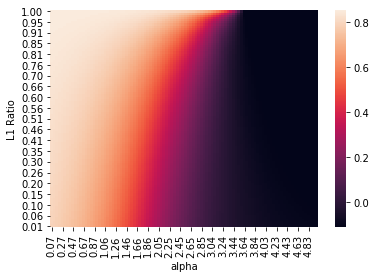

In [196]:
arr = np.fliplr(arr)
plot_heatmap(arr)

This heat map represents the r^2 values with the given alpha and L1 ratio values. The map shows that the best r^2 values given by the elastic net are generated when L1 is 1, which means a lasso regression, and also when alpha is closest to 5. This graph also shows that alpha is more deterministic of r^2 values than the L1 values, because when y=0, the x axis does change colors as it increases, but when x=0, the y axis is continuously black.

# Question 2 (5 points)
Suppose you learn a ridge regression based on some of the independent variables available to you, and including a few interaction terms as well. Your result is disappointing, and you believe that the model is suffering from either too much bias or too much variance. Describe briefly how you will test which alternative is more likely to be true. (there is no extra data that you can use, so “get more data” is not an option).

I would check to see the difference between the training set R^2 score and the test set R^2 score. If it scored quite high on the training set, but very low on the test set, it shows that the model is overfitting. This is a sign of too much variance. If the training and test set R^2 scores are both quite low, then this shows that it is underfitting, and is a sign of too much bias.

Another way is that I would do a cross validation on the test set changing the number of k-fold to see which one is closer to the MSE obtained.
If it is for a low value of lambda, it means that the model is to complex and therefore we are in the situation of low biased and high variance (overfitting). If the approximation of my MSE is closer when lambda high, that means that we are suffering from a high bias (underfitting).

## Answer 2

# Question 3 Bias-Variance (20 pts): 

We want to build a model that can predict y for unknown inputs x.(15 pts)

(a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the train and test points on the same plot, clearly denoting the training and testing points. On the same figure, plot the predictions of the linear model using x_all. All the plots must be in the same figure and be clearly labeled.


(b) (10 pts) Fit polynomial models of degrees 2, 3, 4 and 12 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (train and test points) as before.  On the same figure, plot the predictions of the polynomial models using x_all. All the plots must be in the same figure and be clearly labeled.


(c) (5 pts) Which model performed the best? Explain.


* Use the below code to load the data from the file 'ps01.data'. It is organized as a dictionary, of train and test data.

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_all = np.linspace(-2,5,101).reshape(-1,1)
all_files = np.load("q3_data.npz")
x_train, y_train, x_test, y_test = all_files['arr_0'], all_files['arr_1'], all_files['arr_2'], all_files['arr_3']

### Answer

#### (a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the train and test points on the same plot, clearly denoting the training and testing points. On the same figure, plot the predictions of the linear model using x_all. All the plots must be in the same figure and be clearly labeled.

The prediction on the test set MSE is 4.739110717634691


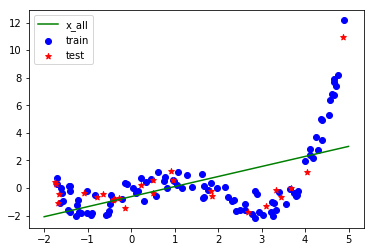

In [187]:
lin = LinearRegression().fit(x_train, y_train)
lin_pred = lin.predict(x_all)
#MSE = mean_squared_error(y_test, lin_pred)

fig, ax1 = plt.subplots()

ax1.scatter(x_train, y_train, c='b', label='train')
ax1.scatter(x_test, y_test, c='r', marker='*', label='test')
ax1.plot(x_all, lin_pred, c='g', label='x_all')

plt.legend(loc='upper left')

lin_pred = lin.predict(x_test)
MSE = mean_squared_error(y_test, lin_pred)
print('The prediction on the test set MSE is {}'.format(MSE))

### (b) (10 pts) Fit polynomial models of degrees 2, 3, 4 and 12 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (train and test points) as before. On the same figure, plot the predictions of the polynomial models using x_all. All the plots must be in the same figure and be clearly labeled.

The degree 2 polynomial model produced a train MSE of 3.2414218538144657 and a test MSE of 3.1186880128035512

The degree 3 polynomial model produced a train MSE of 1.4201223351315237 and a test MSE of 1.6698703639509385

The degree 4 polynomial model produced a train MSE of 0.37459501477803137 and a test MSE of 0.27939743902349146

The degree 12 polynomial model produced a train MSE of 0.329748479226362 and a test MSE of 0.4022876196256975


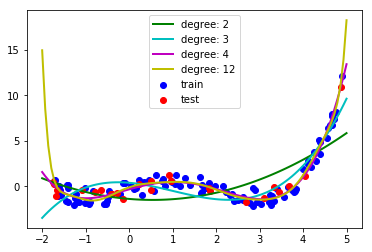

In [193]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

polyreg_2 = make_pipeline(PolynomialFeatures(2), LinearRegression()).fit(x_train, y_train)
polyreg_3 = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(x_train, y_train)
polyreg_4 = make_pipeline(PolynomialFeatures(4), LinearRegression()).fit(x_train, y_train)
polyreg_12 = make_pipeline(PolynomialFeatures(12), LinearRegression()).fit(x_train, y_train)

pred_tr_2 = polyreg_2.predict(x_train)
pred_te_2 = polyreg_2.predict(x_test)
all_pred_2 = polyreg_2.predict(x_all)
MSE_tr_2 = mean_squared_error(y_train, pred_tr_2)
MSE_te_2 = mean_squared_error(y_test, pred_te_2)

pred_tr_3 = polyreg_3.predict(x_train)
pred_te_3 = polyreg_3.predict(x_test)
all_pred_3 = polyreg_3.predict(x_all)
MSE_tr_3 = mean_squared_error(y_train, pred_tr_3)
MSE_te_3 = mean_squared_error(y_test, pred_te_3)

pred_tr_4 = polyreg_4.predict(x_train)
pred_te_4 = polyreg_4.predict(x_test)
all_pred_4 = polyreg_4.predict(x_all)
MSE_tr_4 = mean_squared_error(y_train, pred_tr_4)
MSE_te_4 = mean_squared_error(y_test, pred_te_4)

pred_tr_12 = polyreg_12.predict(x_train)
pred_te_12 = polyreg_12.predict(x_test)
all_pred_12 = polyreg_12.predict(x_all)
MSE_tr_12 = mean_squared_error(y_train, pred_tr_12)
MSE_te_12 = mean_squared_error(y_test, pred_te_12)

print('The degree 2 polynomial model produced a train MSE of {} and a test MSE of {}'\
     .format(MSE_tr_2, MSE_te_2))
print('\nThe degree 3 polynomial model produced a train MSE of {} and a test MSE of {}'\
     .format(MSE_tr_3, MSE_te_3))
print('\nThe degree 4 polynomial model produced a train MSE of {} and a test MSE of {}'\
     .format(MSE_tr_4, MSE_te_4))
print('\nThe degree 12 polynomial model produced a train MSE of {} and a test MSE of {}'\
     .format(MSE_tr_12, MSE_te_12))

fig, ax1 = plt.subplots()

ax1.scatter(x_train, y_train, c='b', label='train')
ax1.scatter(x_test, y_test, c='r', label='test')
ax1.plot(x_all, all_pred_2, c='g', label='degree: 2', linewidth=2)
ax1.plot(x_all, all_pred_3, c='c', label='degree: 3', linewidth=2)
ax1.plot(x_all, all_pred_4, c='m', label='degree: 4', linewidth=2)
ax1.plot(x_all, all_pred_12, c='y', label='degree: 12', linewidth=2)
plt.legend(loc='best')

### (c) (5 pts) Which model performed the best? Explain.

The 4th degree polynomial model. It has the lowest Test MSE at 0.279 .

# Question 4 - Stochastic Gradient Descent (25 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD. (2pts) Report the MSE at the end of 15 epochs for the two best combinations.


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(5) 
    def sgd(self, gradient):
        self.coef = self.coef - (self.learning_rate * gradient)
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                 # Compute error
                X_i = X[i,:]
                e_i = self.linearPredict(X_i) - y[i] 
                # Compute gradients
                gradient = (e_i * X_i) + (self.regularization * self.coef)
                # Update weights
                self.sgd(gradient)
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 5))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        return X.dot(self.coef)
         
        

In [6]:
data = pd.read_csv('q4_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer 

### 1.

$$ \hat y = w_{0} + w_{1}x_{1} + w_{2}x_{1}x_{2} + w_{3}e^{-x_{1}}$$
We want to minimize the loss function below:
$$ L = ( \hat y - y)^2 $$
To derive the coefficient updates, we need the partial derivatives below:
$$\frac{\partial L}{\partial \hat y}= 2 * (\hat y - y)$$
$$\frac{\partial \hat y}{\partial \hat w_{0}} = 1$$
$$\frac{\partial \hat y}{\partial \hat w_{1}} = x_{1}$$
$$\frac{\partial \hat y}{\partial \hat w_{2}} = x_{1} * x_{2}$$
$$\frac{\partial \hat y}{\partial \hat w_{3}} = e^{-x_{1}}$$
So we can derive the coefficient updates:
$$ w_{0}' = w_{0} - \eta * (\frac{\partial L}{\partial b})$$
$$ w_{0}' = w_{0} - \eta * (\frac{\partial L}{\partial \hat y} * \frac{\partial \hat y}{\partial b}) $$
$$ w_{0}' = w_{0} - \eta * [2 * (\hat y - y)] $$
$$ w_{1}' = w_{1} - \eta * (\frac{\partial L}{\partial w_{1}})$$
$$ w_{1}' = w_{1} - \eta * (\frac{\partial L}{\partial \hat y} * \frac{\partial \hat y}{\partial w_{1}})$$
$$ w_{1}' = w_{1} - \eta * (2 * (\hat y - y) * x_{1})$$
$$ w_{2}' = w_{2} - \eta * (\frac{\partial L}{\partial w_{2}})$$
$$ w_{2}' = w_{2} - \eta * (\frac{\partial L}{\partial \hat y} * \frac{\partial \hat y}{\partial w_{2}})$$
$$ w_{2}' = w_{2} - \eta * (2 * (\hat y - y) * x_{1} * x_{2})$$
$$ w_{3}' = w_{3} - \eta * (\frac{\partial L}{\partial w_{3}})$$
$$ w_{3}' = w_{3} - \eta * (\frac{\partial L}{\partial \hat y} * \frac{\partial \hat y}{\partial w_{3}})$$
$$ w_{3}' = w_{3} - \eta * (2 * (\hat y - y) * e^{-x_{1}})$$

### 2.

### Using SGD


In [7]:

Lr_reg = []


for i in range(len(learning_rate)):
    for j in range(len(regularization)):
        Lr_reg.append((learning_rate[i], regularization[j]))

Lr_reg = pd.DataFrame(Lr_reg)

scores = []
for i in range(len(Lr_reg)):
    model = Regression(Lr_reg.iloc[i][0], Lr_reg.iloc[i][1], n_epochs)
    model.fit(X,y)
    scores.append(model.lowest_mse)

Lr_reg['scores'] = scores
Lr_reg = Lr_reg.rename(columns = {0:'learning_rate', 1:'regularization',
                        'scores':'scores'})




/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in multiply
/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply
/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  
/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in square
/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in multiply
  


The MSE for the best model is 0.027391087575201017
The MSE for the second best model is 0.030495991520073523


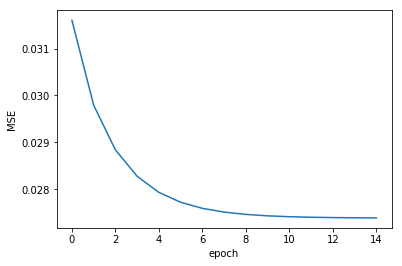

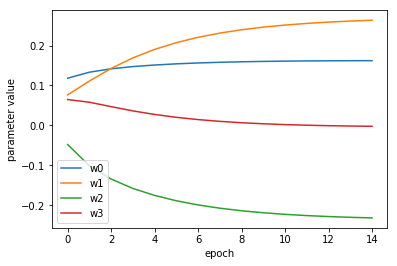

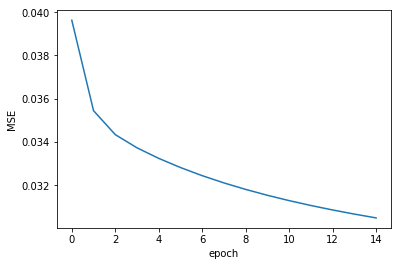

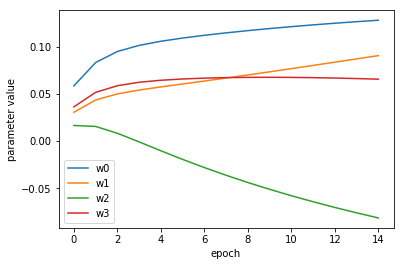

In [8]:

Lr_reg_sort = Lr_reg.sort_values(by ='scores')
Lr_reg_sort = Lr_reg_sort.reset_index().drop(columns=['index'])

model = Regression(Lr_reg_sort['learning_rate'][0],
                  Lr_reg_sort['regularization'][0],
                  n_epochs)
model.fit(X, y, plot=True)

model1 = Regression(Lr_reg_sort['learning_rate'][1],
                  Lr_reg_sort['regularization'][1],
                  n_epochs)
model1.fit(X, y, plot=True)

print('The MSE for the best model is {}'.format(Lr_reg_sort['scores'][0]))
print('The MSE for the second best model is {}'.format(Lr_reg_sort['scores'][1]))

(0.0001, 0)
(100, 0)
[0.027391087575201017, 0.027391087575201017]
[ 0 18]
(0.001, 0)
(0.0001, 0)


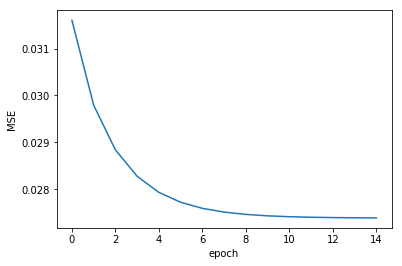

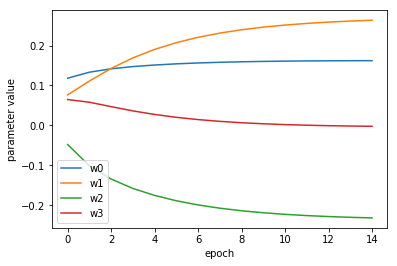

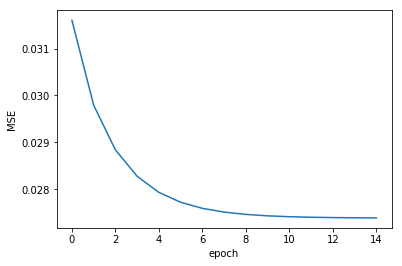

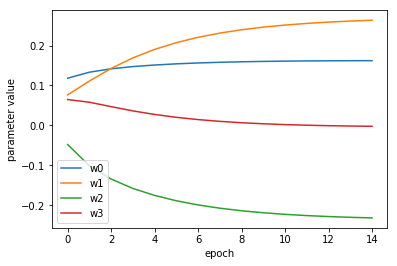

In [9]:
Lr_reg = []
for i in range(0,len(learning_rate)):
    for j in range(0,len(regularization)):
        Lr_reg.append((learning_rate[i], regularization[j]))
scores = []
for k in range(0,len(Lr_reg)):
    model = Regression(Lr_reg[i][0], Lr_reg[i][1], n_epochs)
    model.fit(X,y)
    scores.append(model.lowest_mse)






Lr_reg_1 = np.argsort(np.array(scores))[:2]
print(Lr_reg[Lr_reg_1[0]])
print(Lr_reg[Lr_reg_1[1]])
scores = []
for k in Lr_reg_1:
    sgd = Regression(Lr_reg[i][0], Lr_reg[i][1],n_epochs)
    sgd.fit(X,y,plot=True)
    scores.append(sgd.lowest_mse)
print(scores)
reg = Regression(.0001, 100, n_epochs)
print(Lr_reg_1)
print(Lr_reg[3])
print(Lr_reg[0])